In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv("./Road Accident/Road-Accident.csv", na_values=-1, parse_dates=['time'], infer_datetime_format=True)

data.head()
data.shape

(285331, 70)

In [4]:

nan_values = [[c, data[c].isnull().sum()/data.shape[0]] for c in data.columns.values]
for n in nan_values:
    if n[1] > 0.4:
        print(n)
        
# we are removing columns with str types   
data = data.select_dtypes(exclude=['O'])
        
print(data.shape)

# we are dropping columns with more than 40% missing values
for i in nan_values:
    if i[1] > 0.4:
        data.drop(i[0],axis=1, inplace=True)
print(data.shape)

['driver_imd_decile', 1.0]
['vehicle_imd_decile', 1.0]
['casualty_home_area_type', 0.42200461919665233]
['casualty_imd_decile', 0.47667445878646203]
(285331, 66)
(285331, 62)


In [ ]:
#trying to find relationships between input features

reduced_data = data[50, :]

sns.pairplot(reduced_data)

In [6]:
# print(data['casualty_class'])
# print(pd.isnull(data['casualty_class']).sum())

nan_casualties = data[pd.isnull(data['casualty_class'])]

print("data shape: ", data.shape)
print("nan casualties shape: ", nan_casualties.shape)

data['casualty_class'].value_counts()

mean = data['casualty_class'].mean()

casualties = data['casualty_class'].dropna()
casualty_index = np.array(casualties.index)

print("casualty index: ", casualty_index)

casualties = data.iloc[casualty_index, :]

casualties.head()

data shape:  (285331, 70)
nan casualties shape:  (99259, 70)
casualty index:  [     2      3      5 ... 285327 285329 285330]


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5,201506E098780,2,1,0,9,0,5,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
6,201506E098792,1,3,0,4,0,2,0,0,0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0
8,201506E098804,1,9,0,14,0,1,0,0,0,...,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0


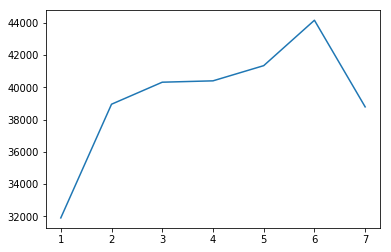

In [27]:
plt.plot(data.groupby('day_of_week')['casualty_class'].sum())

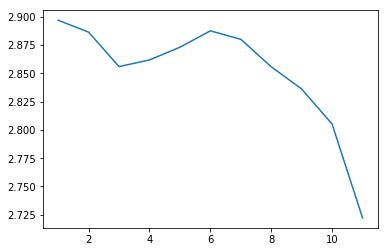

In [112]:
plt.plot(data.groupby('age_band_of_casualty')['casualty_severity'].mean())

In [61]:
data.groupby('sex_of_driver')['casualty_severity'].mean()

sex_of_driver
-1    3.000000
 1    2.840520
 2    2.910056
 3    2.847300
Name: casualty_severity, dtype: float64

In [7]:
print(data['casualty_severity'])

0         NaN
1         NaN
2         3.0
3         3.0
4         NaN
5         3.0
6         3.0
7         NaN
8         3.0
9         3.0
10        NaN
11        3.0
12        NaN
13        NaN
14        3.0
15        NaN
16        NaN
17        NaN
18        NaN
19        3.0
20        NaN
21        3.0
22        3.0
23        3.0
24        NaN
25        3.0
26        3.0
27        NaN
28        3.0
29        2.0
         ... 
285301    3.0
285302    3.0
285303    3.0
285304    NaN
285305    NaN
285306    NaN
285307    3.0
285308    3.0
285309    2.0
285310    3.0
285311    2.0
285312    3.0
285313    3.0
285314    3.0
285315    NaN
285316    NaN
285317    NaN
285318    NaN
285319    NaN
285320    3.0
285321    3.0
285322    3.0
285323    NaN
285324    3.0
285325    NaN
285326    NaN
285327    3.0
285328    NaN
285329    3.0
285330    3.0
Name: casualty_severity, Length: 285331, dtype: float64


In [8]:
print(data.groupby('day_of_week').count())

             accident_index  vehicle_reference  vehicle_type  \
day_of_week                                                    
1                     31539              31539         31539   
2                     40751              40751         40751   
3                     43159              43159         43159   
4                     43204              43204         43204   
5                     43552              43552         43552   
6                     45779              45779         45779   
7                     37347              37347         37347   

             towing_and_articulation  vehicle_manoeuvre  \
day_of_week                                               
1                              31539              31539   
2                              40751              40751   
3                              43159              43159   
4                              43204              43204   
5                              43552              43552   
6         

In [9]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

load_boston()


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3